## Домашнее задание : "Обучение с подкреплением"

ФИО: Усцов Артем Алеексеевич

# Задание 1

Обучите алгоритм Q-learning для сред FrozenLake-v1 и Blackjack-v1, в частности подберите оптимальную alpha. (1 балл)

In [1]:
!pip uninstall gym -y
!pip install gym
!pip uninstall ale-py -y
!pip install ale-py
!pip install "gym[toy_text]"

Found existing installation: gym 0.21.0
Uninstalling gym-0.21.0:
  Successfully uninstalled gym-0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 721 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827651 sha256=02fea9c8579093fa2deeacb5214ea0e34c983f52dc48d8f51997d5cee81c06dc
  Stored in directory: /root/.cache/pip/wheels/17/79/65/7afedc162d858b02708a3b8f7a6dd5b1000dcd5b0f894f7cc1
Successfully built gym
Found existing installation: ale-py 0.8.0
Uninstalling ale-py-0.8.0:
  Successfully uninstalled ale-py-0.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ale_py-0.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
Looking in indexes: https://pypi.org/

In [3]:
import matplotlib.pyplot as plt
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

import gym
import numpy as np 
from gym.envs.toy_text.frozen_lake import generate_random_map
import numpy as np 
import random

import ale_py

import itertools
from tqdm.notebook import tqdm

#create a single game instance
env = gym.make("FrozenLake-v1", map_name="8x8", render_mode="rgb_array", is_slippery=True)

#start new game
env.reset()

(0, {'prob': 1})

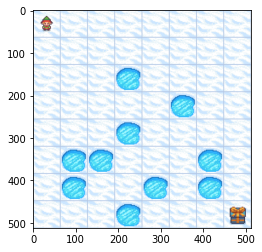

In [5]:
# display the game state
plt.imshow(env.render())

In [ ]:
class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)

    def learnQ(self, state, action, reward, value):
        oldv = self.q.get((state, action), None)

        if oldv is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

In [ ]:
def run_episode_qlearn_learn(env, qlearn, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = qlearn.chooseAction(obs)
        obs_new, reward, done, _, __ = env.step(action)
        qlearn.learn(obs, action, reward, obs_new)
        obs = obs_new
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [ ]:
def run_episode_qlearn(env, qlearn, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = qlearn.chooseAction(obs)
        obs_new, reward, done, _, __ = env.step(action)
        obs = obs_new
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [ ]:
def evaluate_qlearn(env, qlearn, gamma = 1.0, n = 100):
    scores = [
            run_episode_qlearn(env, qlearn, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [ ]:
def qlearning(env, qlearn, gamma = 1.0, render = False, n_epochs=10, verbose=False):
    for epoch in range(n_epochs):
        total_reward = run_episode_qlearn(env, qlearn, gamma, render)
        if verbose and epoch % 100 == 0:
            print(f'reward {total_reward} for {epoch} epochs')

In [ ]:
gamma = 1.0
n_epochs = 1000
epsilon = 0.21 # 0.1
alpha = 0.89 # 0.2

In [ ]:
env.unwrapped.action_space.n

4

In [ ]:
env.reset()

0

In [ ]:
results = []
for gamma, epsilon, alpha in tqdm(itertools.product( np.linspace(0, 1.0, 5), np.linspace(0, 1.0, 20), np.linspace(0, 1.0, 20) )):
    qlearn = QLearn(actions=range(env.unwrapped.action_space.n), gamma=gamma, epsilon=epsilon, alpha=alpha)
    env = gym.make("FrozenLake-v1", new_step_api=True)
    qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
    q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
    results.append([q_score, gamma, epsilon, alpha])

0it [00:00, ?it/s]

In [ ]:
sorted(results, reverse=True)[:15]

[[0.06, 1.0, 0.8421052631578947, 0.15789473684210525],
 [0.06, 1.0, 0.5263157894736842, 0.3157894736842105],
 [0.05, 1.0, 0.894736842105263, 0.15789473684210525],
 [0.05, 1.0, 0.3157894736842105, 1.0],
 [0.05, 1.0, 0.3157894736842105, 0.2631578947368421],
 [0.05, 1.0, 0.10526315789473684, 0.10526315789473684],
 [0.04, 1.0, 0.8421052631578947, 0.7894736842105263],
 [0.04, 1.0, 0.5789473684210527, 0.8421052631578947],
 [0.04, 1.0, 0.5263157894736842, 0.47368421052631576],
 [0.04, 1.0, 0.5263157894736842, 0.2631578947368421],
 [0.04, 1.0, 0.42105263157894735, 0.894736842105263],
 [0.04, 1.0, 0.3684210526315789, 0.3157894736842105],
 [0.04, 1.0, 0.3157894736842105, 0.7894736842105263],
 [0.04, 1.0, 0.3157894736842105, 0.05263157894736842],
 [0.04, 1.0, 0.2631578947368421, 0.9473684210526315]]

In [ ]:
gamma = 1.0
n_epochs = 1000

epsilon = 0.315
alpha = 0.263

In [ ]:
qlearn = QLearn(actions=range(env.unwrapped.action_space.n), gamma=gamma, epsilon=epsilon, alpha=alpha)
env = gym.make("FrozenLake-v1", new_step_api=True)
qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
q_score

0.05

In [7]:
env.reset()

#create a single game instance
env = gym.make("Blackjack-v1", render_mode="rgb_array")

#start new game
env.reset()

((15, 1, False), {})

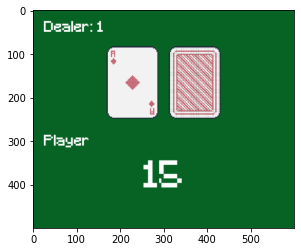

In [8]:
# display the game state
plt.imshow(env.render())

In [ ]:
results = []
for gamma, epsilon, alpha in tqdm(itertools.product( np.linspace(0, 1.0, 5), np.linspace(0, 1.0, 20), np.linspace(0, 1.0, 20) )):
    qlearn = QLearn(actions=range(env.unwrapped.action_space.n), gamma=gamma, epsilon=epsilon, alpha=alpha)
    env = gym.make("Blackjack-v1", new_step_api=True)
    qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
    q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
    results.append([q_score, gamma, epsilon, alpha])

0it [00:00, ?it/s]

In [ ]:
sorted(results, reverse=True)[:15]

[[-0.06, 0.0, 1.0, 0.2631578947368421],
 [-0.07, 0.0, 0.9473684210526315, 0.15789473684210525],
 [-0.07, 0.0, 0.7368421052631579, 0.631578947368421],
 [-0.08, 0.0, 0.05263157894736842, 0.42105263157894735],
 [-0.09, 0.0, 0.9473684210526315, 0.7894736842105263],
 [-0.1, 0.0, 0.05263157894736842, 0.5263157894736842],
 [-0.12, 0.0, 0.3157894736842105, 0.3157894736842105],
 [-0.12125, 0.25, 0.2631578947368421, 0.42105263157894735],
 [-0.12625, 0.75, 0.9473684210526315, 0.7894736842105263],
 [-0.12625, 0.25, 0.3684210526315789, 1.0],
 [-0.1275, 0.5, 0.894736842105263, 0.42105263157894735],
 [-0.12765625, 0.25, 0.47368421052631576, 0.3157894736842105],
 [-0.13, 0.0, 0.7894736842105263, 0.8421052631578947],
 [-0.13078125, 0.25, 0.3684210526315789, 0.21052631578947367],
 [-0.13359375, 0.25, 0.631578947368421, 0.631578947368421]]

In [ ]:
gamma = 1.0
n_epochs = 1000

epsilon = 0.737
alpha = 0.631

In [ ]:
env.reset()

(17, 6, True)

In [ ]:
qlearn = QLearn(actions=range(env.unwrapped.action_space.n), gamma=gamma, epsilon=epsilon, alpha=alpha)
env = gym.make("Blackjack-v1", new_step_api=True)
qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
q_score

-0.59

# Задание 2

Обучите алгоритм Policy Gradients (или Actor Critic) для среды https://www.gymlibrary.dev/environments/atari/breakout/ . Продемонстрируйте, что для обученного агента растет время игры. (2 балла)

In [17]:
def run_episode(env, policy, gamma = 1.0, render = False):
    obs = env.reset()[0]
    total_reward = 0
    step_idx = 0
    #reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _, _ = env.step(int(policy[obs]))

        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [18]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [48]:
def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    q = np.zeros((env.observation_space.n, env.action_space.n))
    for S in env.env.P.keys():
        for a in env.env.P[S].keys():
            for p, s, r, _ in env.env.P[S][a]:
                q[S, a] += p * r + p * gamma * v[s]
        policy[S] = np.argmax(q[S, :])
    return policy

In [49]:
def compute_policy_v(env, policy, gamma=1.0):
    v_cur = np.zeros(env.observation_space.shape[0])
    while True:
        v_prev = v_cur.copy()
        for S in range(env.observation_space.shape[0]):
            v_cur[S] = np.sum([p * (r + gamma * v_prev[s]) 
                               for p, s, r, _ in env.env.P[S][policy[S]]])
        if np.linalg.norm(v_cur - v_prev) < 1e-10:
            break
    return v_cur

In [50]:
def policy_iteration(env, gamma = 1.0):
    policy = np.random.choice(np.arange(env.action_space.n), env.observation_space.shape[0])
    max_iterations = 1000
    
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            break

        policy = new_policy
    return policy

In [51]:
gamma = 1.0
env = gym.make("Breakout-v4")
optimal_policy = policy_iteration(env.env, gamma=gamma)
policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

print(policy_score)

AttributeError: ignored

In [47]:
dir(env.unwrapped.P)

AttributeError: ignored

In [ ]:
policy_scores = []
gammas = np.linspace(0, 1, 20)
for gamma in gammas:
    env = gym.make("ALE/Breakout-v5", render_mode="ansi")
    optimal_policy = policy_iteration(env.env, gamma=gamma)
    policy_score = evaluate_policy(env, optimal_policy, gamma, n=100)

    policy_scores.append(policy_score)

NamespaceNotFound: ignored

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(gammas, policy_scores)
plt.xlabel('Gamma')
plt.ylabel('Policy Score')
plt.grid(True) 